# Tyrosinase Project Notebook 2

---

In this notebook:

Calculating Lipinski Descriptors and Exploratory Data Analysis of the calculated descriptors.

## Importing required modules/libraries and loading data.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors

In [ ]:
df1 = pd.read_csv("tyrosinase_1.csv")

In [ ]:
df1

,Unnamed: 0,molecule_chembl_id,standard_value,canonical_smiles,bio_class
0,0,CHEMBL207313,1990000.0,O=C(NCc1ccccc1)c1ccccc1,inactive
1,1,CHEMBL287556,16300.0,O=c1cc(CO)occ1O,inactive
2,3,CHEMBL205299,29000.0,O=C(NCc1ccc(O)cc1O)c1ccc(O)cc1O,inactive
3,4,CHEMBL205382,550000.0,O=C(NCc1cc(O)c(O)c(O)c1)c1ccc(O)cc1O,inactive
4,5,CHEMBL204473,1820000.0,O=C(NCc1ccc(O)cc1)c1ccc(O)cc1O,inactive
...,...,...,...,...,...
1512,1535,CHEMBL4575873,65000.0,CC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive
1513,1536,CHEMBL3806298,470000.0,CC(C)CCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive
1514,1537,CHEMBL4556405,180000.0,O=C(O)/C(=C/c1ccc(O)cc1)NC(=O)c1ccccc1,inactive
1515,1538,CHEMBL3805142,250000.0,CCCCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive


# Calculating Lipinski Descriptors

---

Lipinski's rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), is a rule of thumb to evaluate druglikeness or determine if a chemical compound with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans.

Lipinski's Rule states:

*  Molecular weight < 500 Dalton
*  Octoanol-water partition coefficient (LogP) <5
*  Hydrogen bond donors < 5
*  Hydrogen bond acceptors < 10








In [ ]:
def Mol_wt(smiles, verbose = False):
  data = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    data.append(mol)
  
  molwt = []
  for mol in data:
    desc_MolWt = Descriptors.MolWt(mol)
    molwt.append(desc_MolWt)
  
  return molwt


In [ ]:
molwt = Mol_wt(df1.canonical_smiles)

In [ ]:
def LogP(smiles, verbose = False):
  data = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    data.append(mol)

  logp = []
  for mol in data:
    desc_MolLogP = Descriptors.MolLogP(mol)
    logp.append(desc_MolLogP)
  
  return logp

In [ ]:
logp = LogP(df1.canonical_smiles)


In [ ]:
def Hdonors(smiles, verbose = False):
  data = []
  for i in smiles:
    mol = Chem.MolFromSmiles(i)
    data.append(mol)
  hdonors = []
  for mol in data:
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    hdonors.append(desc_NumHDonors)
  
  return hdonors

In [ ]:
hdonors = Hdonors(df1.canonical_smiles)

In [ ]:
def Hacceptors(smiles, verbose = False):
  data = []
  for i in smiles:
    mol = Chem.MolFromSmiles(i)
    data.append(mol)
  hacc = []
  for mol in data:
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
    hacc.append(desc_NumHAcceptors)
  
  return hacc

In [ ]:
hacc = Hacceptors(df1.canonical_smiles)

In [ ]:
df_lipinski = pd.DataFrame()
df_lipinski["Mol_Wt"] = molwt
df_lipinski["LogP"] = logp
df_lipinski["H_Donors"] = hdonors
df_lipinski["H_acceptors"] =hacc
df_lipinski

,Mol_Wt,LogP,H_Donors,H_acceptors
0,211.264,2.6166,1,1
1,142.110,-0.1623,2,4
2,275.260,1.4390,5,5
3,291.259,1.1446,6,6
4,259.261,1.7334,4,4
...,...,...,...,...
1512,221.212,0.9538,3,3
1513,333.428,3.9305,3,3
1514,283.283,2.2477,3,3
1515,319.401,3.6845,3,3


## Combining dataframes

In [ ]:
df_comb = pd.concat([df1,df_lipinski], axis=1)

In [ ]:
df_comb

,Unnamed: 0,molecule_chembl_id,standard_value,canonical_smiles,bio_class,Mol_Wt,LogP,H_Donors,H_acceptors
0,0,CHEMBL207313,1990000.0,O=C(NCc1ccccc1)c1ccccc1,inactive,211.264,2.6166,1,1
1,1,CHEMBL287556,16300.0,O=c1cc(CO)occ1O,inactive,142.110,-0.1623,2,4
2,3,CHEMBL205299,29000.0,O=C(NCc1ccc(O)cc1O)c1ccc(O)cc1O,inactive,275.260,1.4390,5,5
3,4,CHEMBL205382,550000.0,O=C(NCc1cc(O)c(O)c(O)c1)c1ccc(O)cc1O,inactive,291.259,1.1446,6,6
4,5,CHEMBL204473,1820000.0,O=C(NCc1ccc(O)cc1)c1ccc(O)cc1O,inactive,259.261,1.7334,4,4
...,...,...,...,...,...,...,...,...,...
1512,1535,CHEMBL4575873,65000.0,CC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,221.212,0.9538,3,3
1513,1536,CHEMBL3806298,470000.0,CC(C)CCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,333.428,3.9305,3,3
1514,1537,CHEMBL4556405,180000.0,O=C(O)/C(=C/c1ccc(O)cc1)NC(=O)c1ccccc1,inactive,283.283,2.2477,3,3
1515,1538,CHEMBL3805142,250000.0,CCCCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,319.401,3.6845,3,3


# IC50 to pIC50

---
An IC50 value tells us the concentration at which a drug is able to inhibit a particular biological process by 50%.

pIC50 is simply its negative log value in molar.

In this project I have used values of 1000 nM and 10000 nM as classifying values of active , inactive and intermediate compounds. 

An IC50 of 1000 nM is 10-6 M, which is pIC50 = 6.0

An IC50 of 10000 nM is 10-5 M, which is pIC50 = 5.0

In [ ]:
def normalise(inp):
    n = []

    for i in inp['standard_value']:
        if i > 100000000:
          i = 100000000
        n.append(i)

    inp['norms'] = n
    x = inp.drop('standard_value', 1)
        
    return x

Values greater than 100,000,000 will be fixed at 100,000,000 so that the negative logarithm value doesn't become negative.

In [ ]:
df_norm = normalise(df_comb)
df2 = df_norm.drop("standard_value_norm", 1) #added same column with different name hence needed to be deleted
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Unnamed: 0,molecule_chembl_id,canonical_smiles,bio_class,Mol_Wt,LogP,H_Donors,H_acceptors,norms
0,0,CHEMBL207313,O=C(NCc1ccccc1)c1ccccc1,inactive,211.264,2.6166,1,1,1990000.0
1,1,CHEMBL287556,O=c1cc(CO)occ1O,inactive,142.110,-0.1623,2,4,16300.0
2,3,CHEMBL205299,O=C(NCc1ccc(O)cc1O)c1ccc(O)cc1O,inactive,275.260,1.4390,5,5,29000.0
3,4,CHEMBL205382,O=C(NCc1cc(O)c(O)c(O)c1)c1ccc(O)cc1O,inactive,291.259,1.1446,6,6,550000.0
4,5,CHEMBL204473,O=C(NCc1ccc(O)cc1)c1ccc(O)cc1O,inactive,259.261,1.7334,4,4,1820000.0
...,...,...,...,...,...,...,...,...,...
1512,1535,CHEMBL4575873,CC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,221.212,0.9538,3,3,65000.0
1513,1536,CHEMBL3806298,CC(C)CCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,333.428,3.9305,3,3,470000.0
1514,1537,CHEMBL4556405,O=C(O)/C(=C/c1ccc(O)cc1)NC(=O)c1ccccc1,inactive,283.283,2.2477,3,3,180000.0
1515,1538,CHEMBL3805142,CCCCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,319.401,3.6845,3,3,250000.0


In [ ]:
def pIC50(inp):
  p = [] 

  for i in inp['norms']:
    molar = i*(10**-9)
    p.append(-np.log10(molar))
  
  inp['pIC50'] = p
  data = inp.drop('norms' , 1)

  return data

In [ ]:
df3 = pIC50(df2)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Unnamed: 0,molecule_chembl_id,canonical_smiles,bio_class,Mol_Wt,LogP,H_Donors,H_acceptors,pIC50
0,0,CHEMBL207313,O=C(NCc1ccccc1)c1ccccc1,inactive,211.264,2.6166,1,1,2.701147
1,1,CHEMBL287556,O=c1cc(CO)occ1O,inactive,142.110,-0.1623,2,4,4.787812
2,3,CHEMBL205299,O=C(NCc1ccc(O)cc1O)c1ccc(O)cc1O,inactive,275.260,1.4390,5,5,4.537602
3,4,CHEMBL205382,O=C(NCc1cc(O)c(O)c(O)c1)c1ccc(O)cc1O,inactive,291.259,1.1446,6,6,3.259637
4,5,CHEMBL204473,O=C(NCc1ccc(O)cc1)c1ccc(O)cc1O,inactive,259.261,1.7334,4,4,2.739929
...,...,...,...,...,...,...,...,...,...
1512,1535,CHEMBL4575873,CC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,221.212,0.9538,3,3,4.187087
1513,1536,CHEMBL3806298,CC(C)CCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,333.428,3.9305,3,3,3.327902
1514,1537,CHEMBL4556405,O=C(O)/C(=C/c1ccc(O)cc1)NC(=O)c1ccccc1,inactive,283.283,2.2477,3,3,3.744727
1515,1538,CHEMBL3805142,CCCCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,319.401,3.6845,3,3,3.602060


In [ ]:
df3.pIC50.describe()

count    1517.000000
mean        4.528552
std         1.166826
min         1.600153
25%         3.698970
50%         4.342466
75%         5.363512
max         9.397940
Name: pIC50, dtype: float64

## Removing "intermediate" bio-activity class

For EDA, its better to have only 2 major distinct classes in the data.


In [ ]:
df_final = df3[df3['bio_class'] != 'intermediate']
df_final.bio_class.unique()

array(['inactive', 'active'], dtype=object)

In [108]:
count = df_final['bio_class'].value_counts()
df_final.to_csv("tyrosinase_2.csv")

## Exploratory Data Analysis (Lipinski Descriptors)

---



**Importing libraries**

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

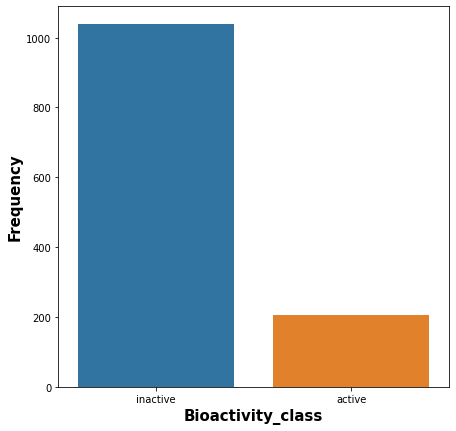

In [ ]:
plt.figure(figsize = (7,7))

sns.countplot(x = "bio_class", data = df_final)

plt.xlabel("Bioactivity_class", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency" , fontsize = 15 , fontweight = "bold")

plt.savefig("activity_freq_countplot.jpeg")



Frequency plot of active and inactive compounds in the data.

---




***Scatter plot of Molecular weight vs LogP***

The bio-activity of compounds can be distinguished with the color of the points.

Molecular Weight and LogP are mapped out on the axes.

pIC50 values of the compounds change the size of their points.

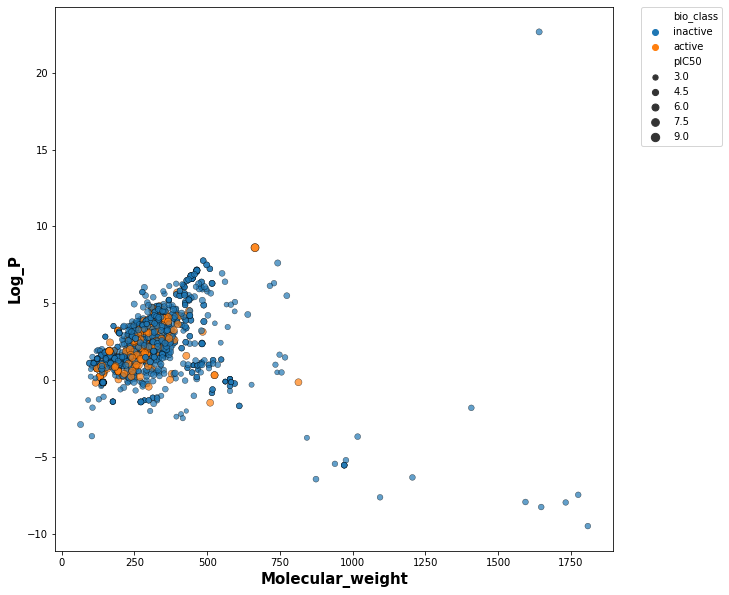

In [ ]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='Mol_Wt', y='LogP', data=df_final, hue='bio_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular_weight', fontsize=15, fontweight='bold')
plt.ylabel('Log_P', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.jpeg')



---



## Boxplots and MannWhitneyU Tests (Lipinski Descriptors)



In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)


  selection = [descriptor, 'bio_class']
  df = df_final[selection]
  active = df[df['bio_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bio_class']
  df = df_final[selection]
  inactive = df[df['bio_class'] == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)
  

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### pIC50 value

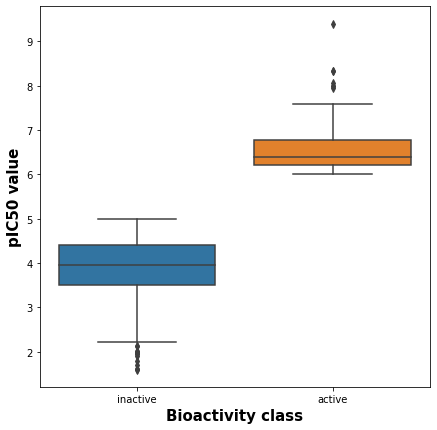

In [ ]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'bio_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=15, fontweight='bold')

plt.savefig('plot_ic50.jpeg')

This makes sense as my threshold for active-inactive was pIC50 5-6.

In [ ]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,5.522992e-114,0.05,Different distribution (reject H0)


Molecular weight

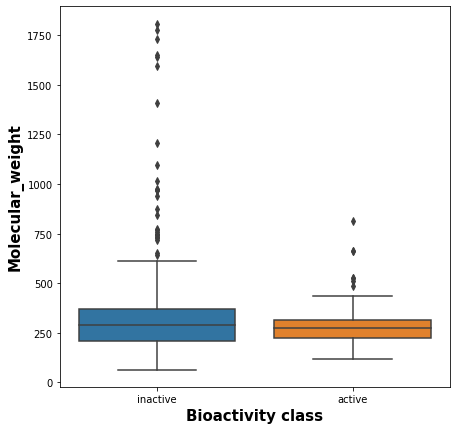

In [ ]:
c

In [ ]:
mannwhitney("Mol_Wt")

,Descriptor,Statistics,p,alpha,Interpretation
0,Mol_Wt,95657.5,0.011108,0.05,Different distribution (reject H0)


LogP

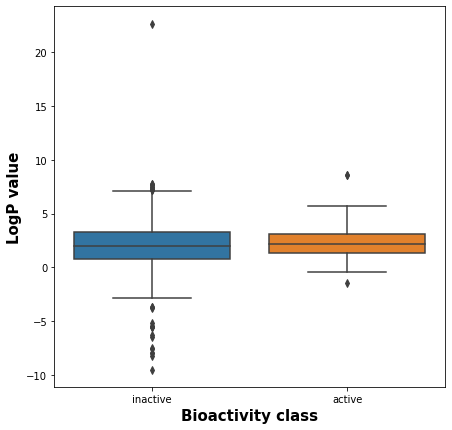

In [ ]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'bio_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('LogP value', fontsize=15, fontweight='bold')

plt.savefig('plot_logp.jpeg')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,99014.5,0.058009,0.05,Same distribution (fail to reject H0)


note same distribution.

Num H Donors

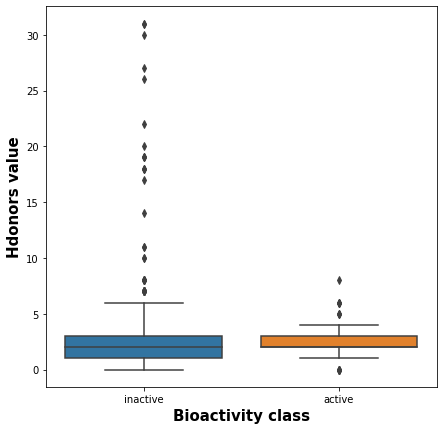

In [ ]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'bio_class', y = 'H_Donors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('Hdonors value', fontsize=15, fontweight='bold')

plt.savefig('plot_hdonors.jpeg')

In [ ]:
mannwhitney("H_Donors")

,Descriptor,Statistics,p,alpha,Interpretation
0,H_Donors,98403.5,0.038993,0.05,Different distribution (reject H0)


Num H Acceptors

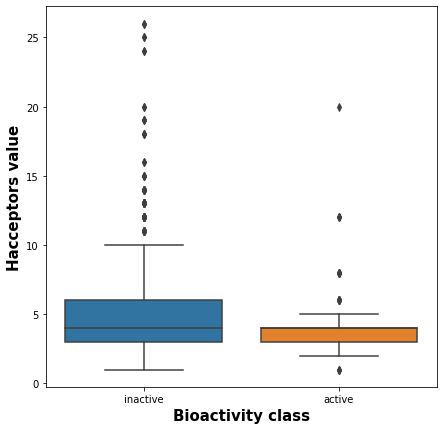

In [ ]:
plt.figure(figsize=(7,7))

sns.boxplot(x = 'bio_class', y = 'H_acceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('Hacceptors value', fontsize=15, fontweight='bold')

plt.savefig('plot_hacceptors.jpeg')

In [ ]:
mannwhitney("H_acceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,H_acceptors,78751.0,1.264059e-09,0.05,Different distribution (reject H0)


Interpretation of statistical results in the project site.


---

### Zip Files

In [ ]:
! zip -r results.zip . -i *.csv *.pdf *.jpeg

updating: mannwhitneyu_Mol_Wt.csv (deflated 9%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: tyrosinase_1.csv (deflated 81%)
updating: plot_MW_vs_LogP.pdf (deflated 4%)
updating: mannwhitneyu_H_Donors.csv (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 10%)
updating: mannwhitneyu_H_acceptors.csv (deflated 11%)
  adding: plot_hacceptors.jpeg (deflated 36%)
  adding: plot_MW_vs_LogP.jpeg (deflated 24%)
  adding: plot_molwt.jpeg (deflated 32%)
  adding: plot_hdonors.jpeg (deflated 36%)
  adding: plot_logp.jpeg (deflated 37%)
  adding: activity_freq_countplot.jpeg (deflated 43%)
  adding: plot_ic50.jpeg (deflated 39%)
